In [1]:
import glob
import matplotlib
import matplotlib.pyplot as plt
import pickle
from pickle import dump
import lmfit
import numpy as np
import scipy.stats as ss
plt.style.use('neuron')
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.formula.api import ols, rlm
import sys
sys.path.append('../')
from Linearity import Neuron
from matplotlib import  rc
rc('text', usetex=False)

/usr/local/lib/python2.7/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
def simpleaxis(axes, every=False):
    if not isinstance(axes, (list, np.ndarray)):
        axes = [axes]
    for ax in axes:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        if every:
            ax.spines['bottom'].set_visible(False)
            ax.spines['left'].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_title('')

In [5]:
#Colorscheme for squares
color_sqr = { index+1: color for index, color in enumerate(matplotlib.cm.viridis(np.linspace(0,1,9)))}

In [3]:
n = Neuron.load('/home/bhalla/Documents/Codes/data/170222/c2/plots/c2.pkl')

In [4]:
feature = 7 # Area under the curve
neuron = n
expected, observed, g_expected, g_observed = {}, {}, {}, {}
for expType, exp in neuron:
    ## Control case
    if(expType == "Control"):
        for sqr in exp:
            if sqr > 1:
                expected[sqr] = []
                observed[sqr] = []
                for coord in exp[sqr].coordwise:
                    for trial in exp[sqr].coordwise[coord].trials:
                        if all([value == 0 for value in trial.flags.values()]):
                            expected[sqr].append(exp[sqr].coordwise[coord].expected_feature[feature])
                            observed[sqr].append(trial.feature[feature])

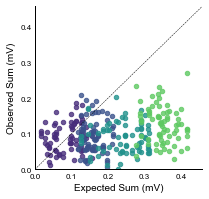

In [6]:
lin_aic = []
dn_aic = []
lin_chi = []
dn_chi = []
max_exp, max_g_exp = 0.,0.
fig, ax = plt.subplots()
squareVal = []
list_control_expected = []
list_control_observed = []

for sqr in sorted(observed):
    squareVal.append(ax.scatter(expected[sqr], observed[sqr], label=str(sqr), c=color_sqr[sqr], alpha=0.8, s=20))
    max_exp = max(max_exp, max(expected[sqr]))
    list_control_expected += expected[sqr]
    list_control_observed += observed[sqr]
    

ax.set_xlim(xmin=0.)
ax.set_ylim(ymin=0.)
ax.set_xlabel("Expected")
ax.set_ylabel("Observed")
ax.set_title("Divisive Normalization and Inhibition fits")

max_exp *=1.1
max_g_exp *=1.1
ax.set_xlim(0,max_exp)
ax.set_ylim(0,max_exp)
ax.set_xlabel("Expected Sum (mV)")
ax.set_ylabel("Observed Sum (mV)")
linear = ax.plot((0,max_exp), (0,max_exp), 'k--')

simpleaxis(ax)
fig.set_figwidth(3)
fig.set_figheight(3)
# dump(fig,file('figures/fig4/4b.pkl','wb'))
plt.show()

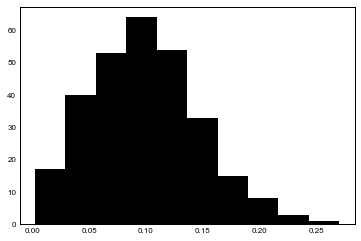

In [7]:
plt.hist(list_control_observed)
plt.show()

In [8]:
feature = 8 # Area under the curve
neuron = n
expected, observed, g_expected, g_observed = {}, {}, {}, {}
for expType, exp in neuron:
    ## Control case
    if(expType == "Control"):
        for sqr in exp:
            if sqr > 1:
                expected[sqr] = []
                observed[sqr] = []
                for coord in exp[sqr].coordwise:
                    for trial in exp[sqr].coordwise[coord].trials:
                        if all([value == 0 for value in trial.flags.values()]):
                            expected[sqr].append(exp[sqr].coordwise[coord].expected_feature[feature])
                            observed[sqr].append(trial.feature[feature])

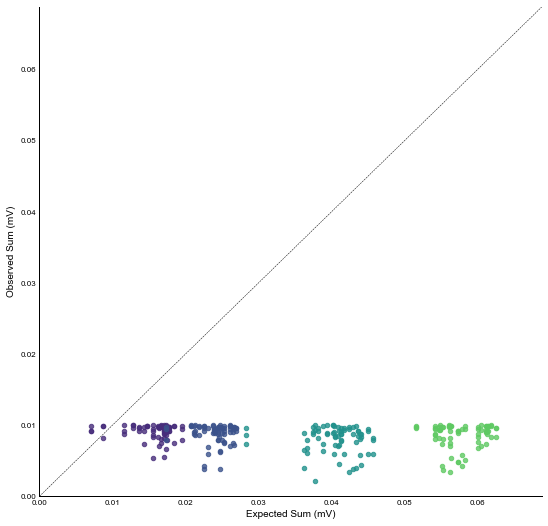

In [10]:
lin_aic = []
dn_aic = []
lin_chi = []
dn_chi = []
max_exp, max_g_exp = 0.,0.
fig, ax = plt.subplots()
squareVal = []
list_control_expected = []
list_control_observed = []

for sqr in sorted(observed):
    squareVal.append(ax.scatter(expected[sqr], observed[sqr], label=str(sqr), c=color_sqr[sqr], alpha=0.8, s=20))
    max_exp = max(max_exp, max(expected[sqr]))
    list_control_expected += expected[sqr]
    list_control_observed += observed[sqr]
    

ax.set_xlim(xmin=0.)
ax.set_ylim(ymin=0.)
ax.set_xlabel("Expected")
ax.set_ylabel("Observed")
ax.set_title("Divisive Normalization and Inhibition fits")

max_exp *=1.1
max_g_exp *=1.1
ax.set_xlim(0,max_exp)
ax.set_ylim(0,max_exp)
ax.set_xlabel("Expected Sum (mV)")
ax.set_ylabel("Observed Sum (mV)")
linear = ax.plot((0,max_exp), (0,max_exp), 'k--')

simpleaxis(ax)
fig.set_figwidth(9)
fig.set_figheight(9)
# dump(fig,file('figures/fig4/4b.pkl','wb'))
plt.show()